<a href="https://colab.research.google.com/github/hamiin47/OB-session/blob/main/Assign_0324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chp 08. 텍스트 분석**

- NLP는 머신이 인간의 언어를 이해하고 해석하는 데 더 중점을 두고 기술이 발전해왔다.
- 텍스트 마이닝이라고도 불리는 텍스트 분석은 비정형 텍스트에서 의미있는 정보를 추출하는 것에 좀 더 중점을 두고 기술이 발전해왔다.

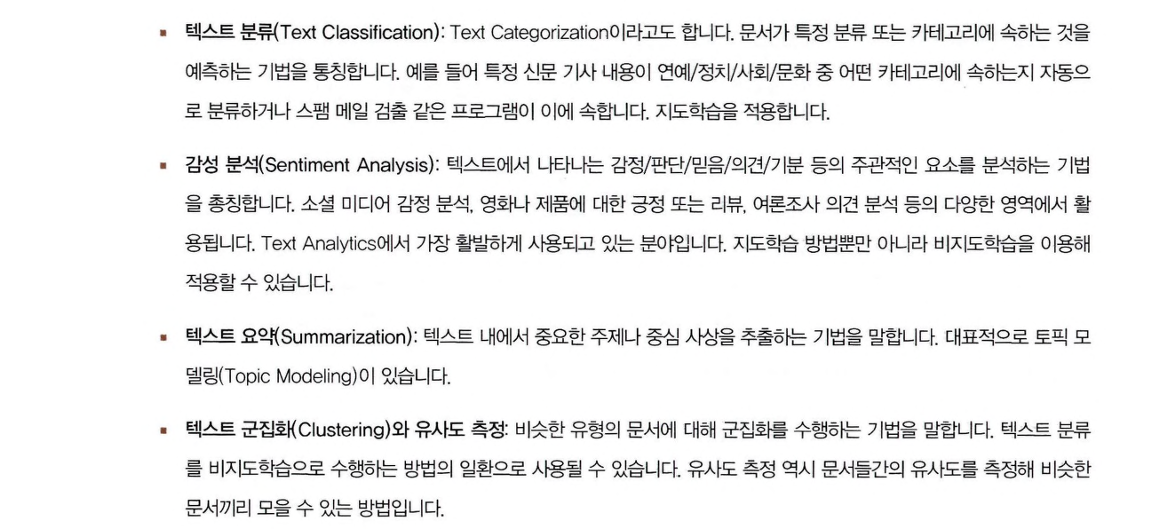

**텍스트 분석 이해**

- 텍스트 분석은 비정형 데이터인 텍스트를 분석하는 것이다.
- 텍스트를 word 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여하면 텍스트는 단어의 조합인 벡터값으로 표현될 수 있는데, 이렇게 텍스트를 변환하는 것을 피처 벡터화 또는 피처 추출이라고 한다.

다음은 머신러닝 기반의 텍스트 분석 프로세스 순서이다.
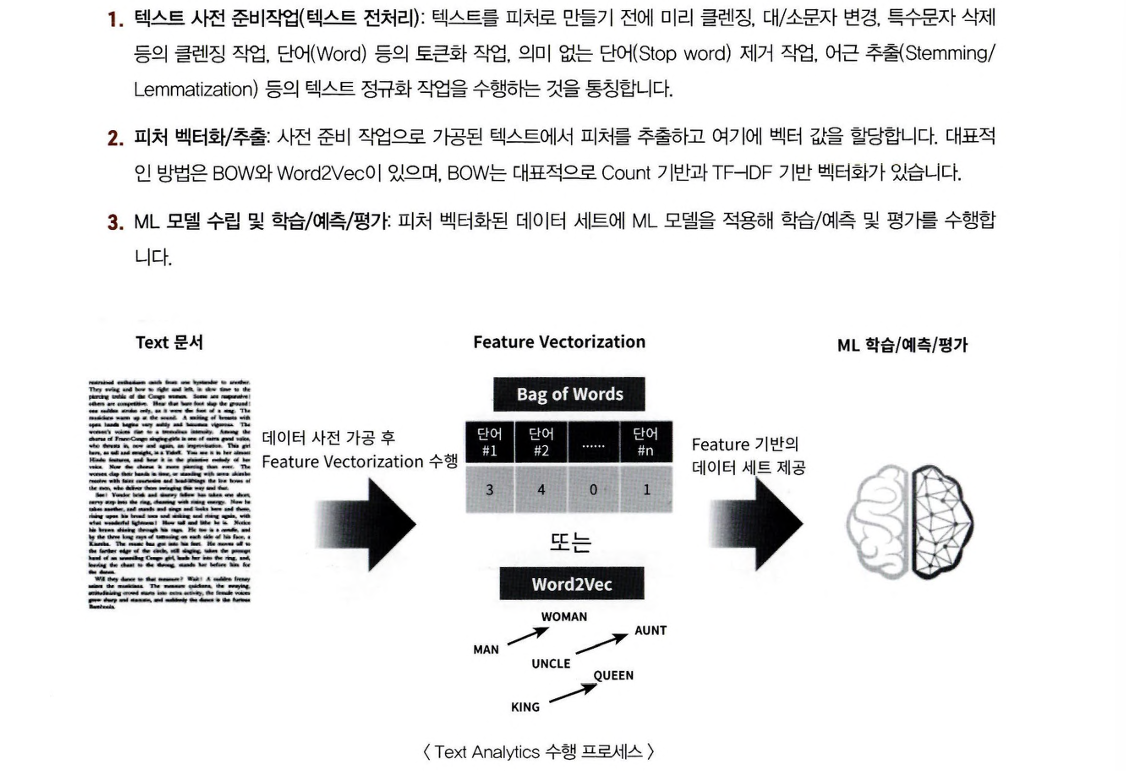

**02. 텍스트 사전 준비 작업 - 텍스트 정규화**

- 텍스트 자체를 바로 피처로 만들 수는 없다. 따라서,사전에 텍스트를 가공하는 준비 작업이 필요하다.
- 텍스트 정규화는 텍스트를 머신러닝 알고리즘이나 NLP 애플리케이션에 입력 데이터로 사용하기 위해 클렌징, 정제, 토큰화 등의 다양한 텍스트 데이터의 사전 작업을 수행하는 것을 의미한다.

[텍스트 정규화 작업]
- 클렌징
- 토큰화
- 필터링/스톱 워드 제거/철자 수정
- Stemming
- Lemmatization


---



문장 토큰화
- 문장의 마침표, 개행문자 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적이다.


In [1]:
from nltk import sent_tokenize
import nltk

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


단어 토큰화
- 문장을 단어로 토큰화하는 것이다.
- 기본적으로 공백, 콤마, 마침표, 개행문자 등으로 단어를 분리하지만, 정규 표현식을 이용해 다양한 유형으로 토큰화를 수행할 수 있다.
- 단어의 순서가 중요하지 않은 경우 문장 토큰화를 사용하지 않고 단어 토큰화만 사용해도 충분하다.

In [4]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [5]:
#sent_tokenize와 word_tokenize를 조합해 문서에 대해서 모든 단어 토큰화 진행
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


스톱 워드 제거
- 스톱 워드는 분석에 큰 의미가 없는 단어를 지칭한다.
- 예를 들어 is, the, a, will 등 문장을 구성하는 필수 문법 요소지만 문맥적으로 큰 의미가 없는 단어들이 이에 해당한다.
- 빈번하게 텍스트에 나타나므로 이것들을 사전에 제거하지 않으면 그 빈번함으로 인해 오히려 중요한 단어로 인지될 수 있다.

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
print('영어 stop words 갯수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 갯수: 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


In [8]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words = []
    # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
    for word in sentence:
        # 소문자로 모두 변환
        word = word.lower()
        # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


Stemming과 Lemmatization
- Stemming과 Lemmatization은 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것이다.
- Stemming은 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있다.
- 반면 Lemmatization은 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아준다.따라서 변환에 더 오랜 시간이 걸린다.

In [9]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


- work의 경우 단순 변화이므로 원형 단어를 제대로 인식한다.
- 그러나 amuse의 경우 amus에 변화가 일어나므로 amus를 원형 단어로 인식한다.
- Lemmatization을 수행하는데, 정확한 원형 단어 추출을 위해 단어의 품사를 입력해줘야한다.

In [10]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


**03. Bag of Words - BOW**
- Bag of Workds 모델은 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델이다.
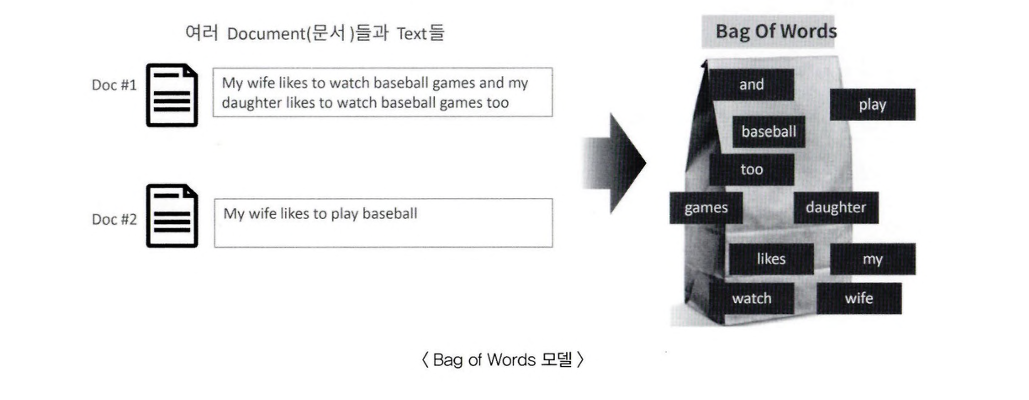

- BOW 모델의 장점은 쉽고 빠른 구축에 있다.
- BOW 모델의 대표적인 단점은 1) 문맥 의미 반영 부족, 2) 최소 행렬 문제 이다.

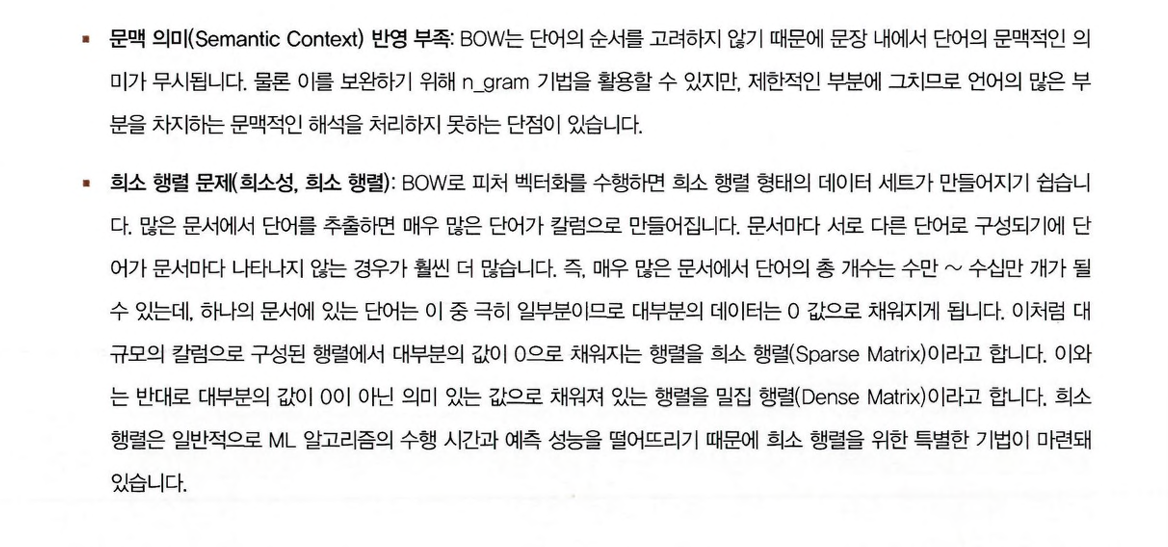

BOW 피처 벡터화
- 머신러닝 알고리즘은 일반적으로 숫자형 피처를 데이터로 입력받아 동작하기 때문에 텍스트와 같은 데이터는 머신러닝 알고리즘에 바로 입력할 수가 없다.
- 따라서 텍스트는 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환해야하는데, 이러한 변환을 피처 벡터화라고 한다.


---



BOW 모델에서 피처 모델화를 수행한다는 것은 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 갑승로 부여하는 데이터 세트 모델로 변경하는 것이다.
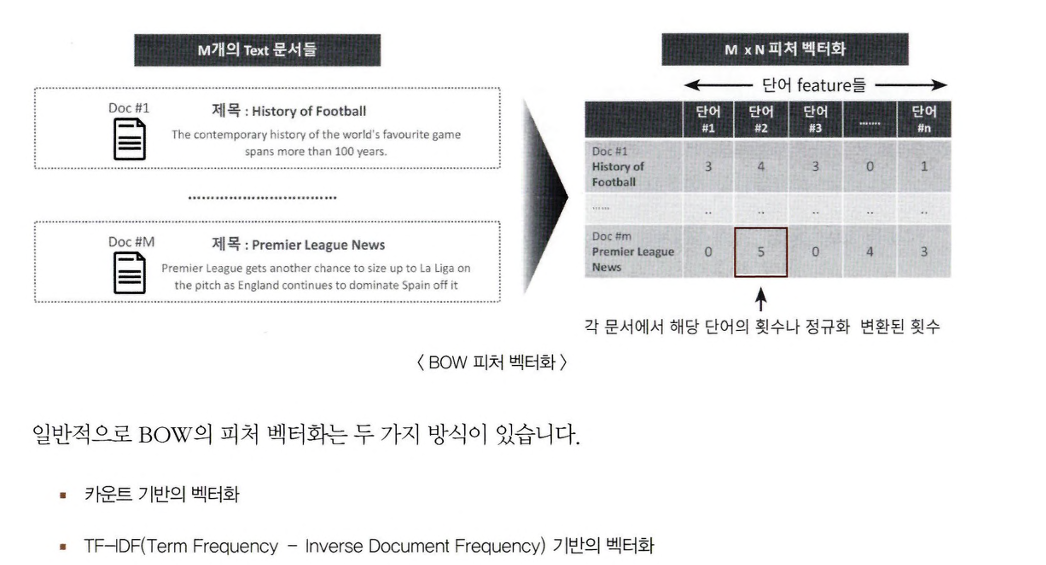

- 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수, 즉 count를 부여하는 경우를 카운트 벡터화라고 한다.
- 카운트 벡터화에서는 카운트 값이 높을수록 중요한 단어로 인식된다. 그러나 카운트만 부여할 경우 그 문서의 특징을 나타내기보다는 언어의 특성상 문장에서 자주 사용될 수밖에 없는 단어까지 높은 값을 부여하게 된다.
- 이러한 문제를 보완하기 위해 TF-IDF는 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식으로 값을 부여한다.


---



사이킷런의 count및 TF-IDF 벡터화 구현 : CountVectorizer, TfidfVectorizer
- 사이킷런의 CountVectorizer 클래스는 단지 피처 벡터화만 수행하지 않으며 소문자 일괄 변환, 토큰화, 스톱 워드 필터링 등의 텍스트 전처리도 함께 수행한다.

다음은 CountVectorizer의 입력 파라미터이다.
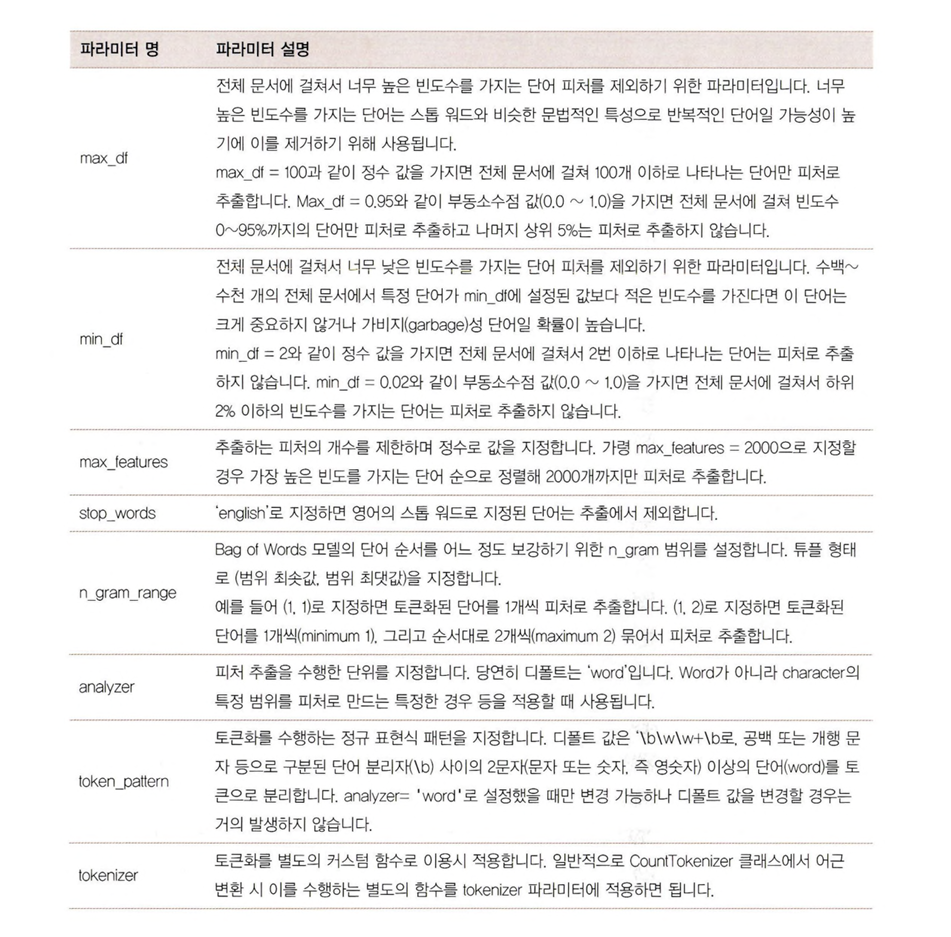

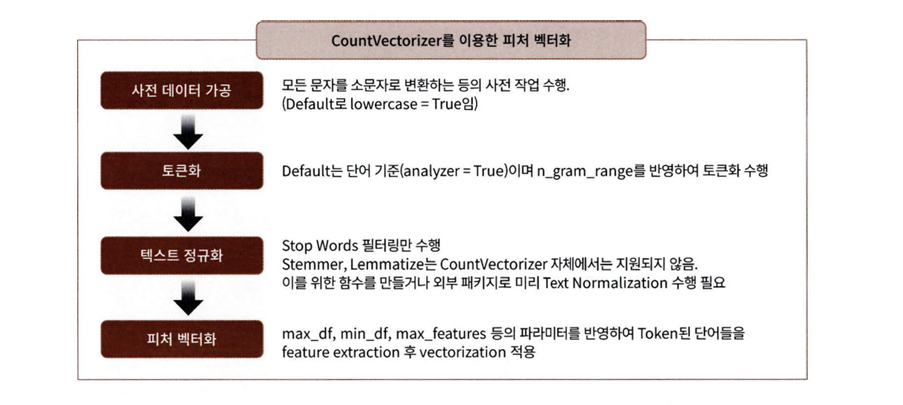


---



BOW 벡터화를 위한 최소 행렬
- 사이킷런의 CountVectorizer/TfidfVectorizer를 이용해 텍스트를 피처 단위로 벡터화해 변화하고 CSR 형태의 희소 행렬을 반환한다.


---
희소 행렬 - COO 형식
- COO 형식은 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과열의 위치를 별도의 배열로 저장하는 방식이다.


In [11]:
import numpy as np

dense = np.array([[3, 0, 1], [0, 2, 0]])

In [12]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3, 1, 2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [13]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

희소 행렬 - CSR 형식
- CSR 형식은 COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식이다.

In [14]:
[[0, 0, 1, 0, 0, 5],[1, 4, 0, 3, 2, 5],[0, 6, 0, 3, 0, 0],[2, 0, 0, 0, 0, 0],[0, 0, 0, 7, 0, 8],[1, 0, 0, 0, 0, 0]]

[[0, 0, 1, 0, 0, 5],
 [1, 4, 0, 3, 2, 5],
 [0, 6, 0, 3, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [0, 0, 0, 7, 0, 8],
 [1, 0, 0, 0, 0, 0]]

In [15]:
from scipy import sparse

dense2 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

# 0이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [16]:
dense3 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)